# HRRR Point Forecasts
It is often helpful to view the HRRR forecasts at a single point over time.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mpl

In [ ]:
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_downloads.HRRR_S3 import get_hrrr_hovmoller
from BB_MesoWest.MesoWest_timeseries import get_mesowest_ts
from BB_MesoWest.MesoWest_STNinfo import get_MW_location_dict
from matplotlib.dates import DateFormatter, HourLocator

## Hovmoller Forecasts
These are not real Hovemoller diagrams, but it is a similar principle--plot two dimensions on a plot. In this case, the two dimension are the forecast valid time (x axis) and the forecast lead time (y axis).

In [ ]:
# Set Date Range
sDATE = datetime(2017, 10, 8, 15)
eDATE = datetime(2017, 10, 9, 15)

# Set HRRR variable
var = 'WIND:10 m'

# Specify a location dictionary: {'name':{'latitude':,'longitude':}}
# Create location dictionary from a MesoWest ID
STID = 'HWKC1'
LD = get_MW_location_dict('HWKC1')

In [ ]:
sDATE

In [15]:
# Get the hovemoller data
hovmoller = get_hrrr_hovmoller(sDATE, eDATE, LD,
                               variable=var,
                               area_stats=False)

finished multiprocessing in 0:00:03.721504 on 22 processers
finished multiprocessing in 0:00:03.213879 on 22 processers
finished multiprocessing in 0:00:03.398176 on 22 processers
finished multiprocessing in 0:00:03.345375 on 22 processers
finished multiprocessing in 0:00:03.546166 on 22 processers
finished multiprocessing in 0:00:03.216810 on 22 processers
finished multiprocessing in 0:00:03.115615 on 22 processers
finished multiprocessing in 0:00:03.326944 on 22 processers
finished multiprocessing in 0:00:03.418393 on 22 processers
finished multiprocessing in 0:00:03.624669 on 22 processers
finished multiprocessing in 0:00:03.786032 on 22 processers
finished multiprocessing in 0:00:03.831008 on 22 processers
finished multiprocessing in 0:00:03.918530 on 22 processers
finished multiprocessing in 0:00:03.720520 on 22 processers
finished multiprocessing in 0:00:03.805239 on 22 processers
finished multiprocessing in 0:00:03.493053 on 22 processers
finished multiprocessing in 0:00:03.6645

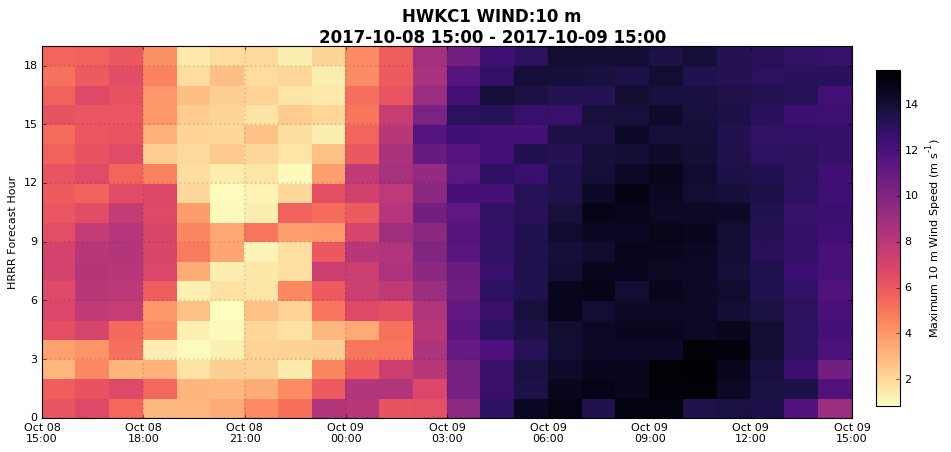

In [26]:
## Reset the defaults (see more here: http://matplotlib.org/users/customizing.html)
mpl.rcParams['figure.figsize'] = [15, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.01
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
fig = plt.figure(1)
ax1 = plt.subplot(111)

plt.suptitle('%s %s\n%s - %s' % \
            (STID,
             var,
             sDATE.strftime('%Y-%m-%d %H:%M'),
             eDATE.strftime('%Y-%m-%d %H:%M')))

# HRRR Hovmoller Plot
hv = ax1.pcolormesh(hovmoller['valid_1d+'],
                    hovmoller['fxx_1d+'],
                    hovmoller[STID],
                    cmap='magma_r')

ax1.set_xlim(hovmoller['valid_1d+'][0], hovmoller['valid_1d+'][-1])
ax1.set_ylim(0, 19)
ax1.set_yticks(range(0, 19, 3))
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel('HRRR Forecast Hour')

ax1.grid()

fig.subplots_adjust(hspace=0, right=0.8)

cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cb = fig.colorbar(hv, cax=cbar_ax)
cb.ax.set_ylabel(r'Maximum 10 m Wind Speed (m s$\mathregular{^{-1}}$)')

ax1.xaxis.set_major_locator(HourLocator(byhour=range(0,24,3)))
dateFmt = DateFormatter('%b %d\n%H:%M')
ax1.xaxis.set_major_formatter(dateFmt)

## Hovmoller with MesoWest Station
Direct comparison of HRRR point forecasts with MesoWest station observations.

In [45]:
# Get MesoWest observations from station
a = get_mesowest_ts(STID, sDATE-timedelta(hours=6), eDATE+timedelta(hours=6), variables='wind_speed')

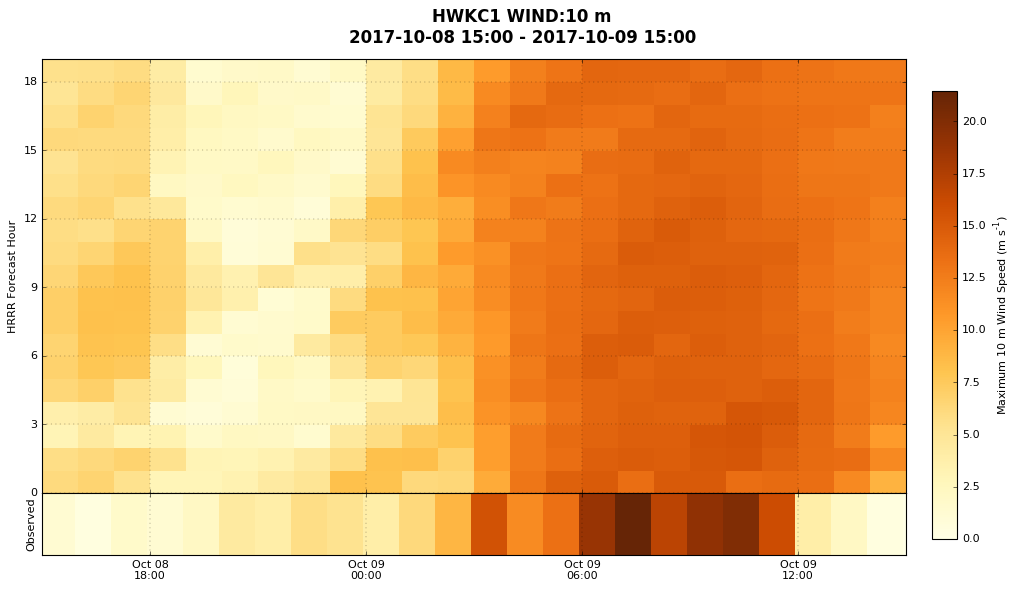

In [53]:
## Reset the defaults (see more here: http://matplotlib.org/users/customizing.html)
mpl.rcParams['figure.figsize'] = [16, 8]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.01
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False

# Plot the Hovmoller diagram
fig = plt.figure(1)
ax1 = plt.subplot2grid((8, 1), (0, 0), rowspan=7)
ax2 = plt.subplot(8, 1, 8)
#
plt.suptitle('%s %s\n%s - %s' % \
    (STID, var,
     sDATE.strftime('%Y-%m-%d %H:%M'),\
     eDATE.strftime('%Y-%m-%d %H:%M')))
#
hmax = np.nanmax([np.nanmax(hovmoller[STID]), np.nanmax(a['wind_speed'])])
hmin = 0
cmap = 'YlOrBr'
#
# HRRR Hovmoller (tall subplot on top)
hv = ax1.pcolormesh(hovmoller['valid_1d+'],
                    hovmoller['fxx_1d+'],
                    hovmoller[STID],
                    cmap=cmap,
                    vmax=hmax,
                    vmin=hmin)
ax1.set_xlim(hovmoller['valid_1d+'][0], hovmoller['valid_1d+'][-1])
ax1.set_ylim(0, 19)
ax1.set_yticks(range(0, 19, 3))
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel('HRRR Forecast Hour')
#
# Observed mesh (thin subplot on bottom)
mw = ax2.pcolormesh(a['DATETIME'],
                    range(3),
                    [a['wind_speed'], a['wind_speed']], # just becuasee we need a 2d array of the observations...
                    cmap=cmap,
                    vmax=hmax,
                    vmin=hmin)

ax2.axes.yaxis.set_ticklabels([])
ax2.set_yticks([])
ax2.set_ylabel('Observed')
ax2.set_xlim(hovmoller['valid_1d+'][0], hovmoller['valid_1d+'][-1])
                                        
#
ax1.grid()
ax2.grid()
#
fig.subplots_adjust(hspace=0, right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cb = fig.colorbar(hv, cax=cbar_ax)
cb.ax.set_ylabel(r'Maximum 10 m Wind Speed (m s$\mathregular{^{-1}}$)')
#
ax1.xaxis.set_major_locator(HourLocator(byhour=[0, 6, 12, 18]))
ax2.xaxis.set_major_locator(HourLocator(byhour=[0, 6, 12, 18]))
dateFmt = DateFormatter('%b %d\n%H:%M')
ax2.xaxis.set_major_formatter(dateFmt)

## Map and Time Series (Project Golf)
Orginated from "project golf" http://home.chpc.utah.edu/~u0553130/oper/HRRR_golf/Oaks/photo_viewer2.php

In [ ]:
mpl.rcParams['figure.figsize'] = [15, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False

# Get Data
P_temp = get_hrrr_pollywog_multi(sDATE, 'TMP:2 m', LD, verbose=False); print "got Temp"
P_dwpt = get_hrrr_pollywog_multi(sDATE, 'DPT:2 m', LD, verbose=False); print "got Dwpt"
P_wind = get_hrrr_pollywog_multi(sDATE, 'WIND:10 m', LD, verbose=False); print "got Wind"
P_gust = get_hrrr_pollywog_multi(sDATE, 'GUST:surface', LD, verbose=False); print "got Gust"
P_u = get_hrrr_pollywog_multi(sDATE, 'UGRD:10 m', LD, verbose=False); print "got U10"
P_v = get_hrrr_pollywog_multi(sDATE, 'VGRD:10 m', LD, verbose=False); print "got V10"
P_prec = get_hrrr_pollywog_multi(sDATE, 'APCP:surface', LD, verbose=False); print "got Precip"
P_accum = {} # Accumulated precip

# Convert the units of each Pollywog and each location
for loc in LD.keys():
    # Convert Units for the variables in the Pollywog
    P_temp[loc] = KtoC(P_temp[loc])
    P_dwpt[loc] = KtoC(P_dwpt[loc])
    P_accum[loc] = np.add.accumulate(P_prec[loc]) # Accumulated Precip
    
l = LD[STID]
    
# Make map object
m = Basemap(resolution='i', projection='cyl',\
            llcrnrlon=l['longitude']-.25, llcrnrlat=l['latitude']-.25,\
            urcrnrlon=l['longitude']+.25, urcrnrlat=l['latitude']+.25,)

plt.suptitle('HRRR Forecast: %s' % (l['name']), y=1)
fig = plt.figure(1)
fig.add_subplot(121)

m.drawcounties()
m.arcgisimage(service='World_Shaded_Relief',
                              xpixels=700, # Utah lake wont show if it's less than 700
                              verbose=False)
m.scatter(l['longitude'], l['latitude'], s=100, coor='white', edgecolor='k', zorder=100, latlon=True)